# EUPS Linear Regression

Here's a quick reminder of what linear regression is all about. Each row of the table is a data point that we have observed. It has *features* (attributes) $x_1$ and $x_2$, and an output $y$, that we suspect is related to $x_1$ and $x_2$. For instance, $x_1$ and $x_2$ may be the age and mileage of a car, and $y$ its valuation (price). Seems like the lower the age and mileage are, the higher the valuation might be, right? How do we use this to build a model which is capable of taking in a completely new set of attributes $x_1$ and $x_2$ and producing a reasonable estimation of what $y$ might be? That's **Linear Regression**!

| $x_1$ | $x_2$ | $y$ |
| ----- | ----- | --- |
|  2    | 3     |  8  |
|  1    | 4     |  7.5  |
|  0.2    | -2     |  3  |
|  5    | 5     |  11  |

*Note - these are dummy numbers...don't look for any meaning in them or their relationship!*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib notebook

In /Users/rohan/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/rohan/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/rohan/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/rohan/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/rohan/miniconda3/envs/py3iaml/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecate

## Step 1 - Error

You'll soon see why, but a fundamental part of ML is evaluating how good your predictions are. In this case, we're trying to predict the $y$ for each $x_1$ and $x_2$ pair that we get in, and you can see that $y$ is just a number. Write a function `error(predictions,ys)`, that takes in a numpy array of predictions for $y$ (remember, just a number!), along with the actual ys and returns the *sum squared error*. That means take the difference between each corresponding prediction and actual $y$, square it and sum all of them together into one number at the end.

\begin{equation}
Error = \sum_{i=1}^{N} (prediction_i - y_i)^2
\end{equation}

Note that we are taking in several predictions ($N$ in the formula) and their corresponding $y$s at once. They are both given as 1-D numpy arrays and hopefully you can see that they **must** be the same length, or else we'd have a prediction without a matching actual value or vice versa! Try to use `numpy` as much as possible - it makes the code shorter, cleaner and quicker!

In [2]:
# An example input:
# predictions_example = np.array([[2,5,1,6]])
# ys_example = np.array([[1.4,7,1.2,5.5]])
# Expected Output : 4.65
# Write your code below!
def error(predictions,ys):
    return np.sum((predictions - ys)**2)

## Step 2 - Prediction

Ok great, now how do we actual produce the predictions we just evaluated? Well the form of the prediction of one data point $\mathbf{x} = \begin{pmatrix}x_1 & x_2 & ... & x_n\end{pmatrix}$ for linear regression is just this:

\begin{equation}
\hat{y} = b + w_1x_1 + w_2x_2 + \cdots + w_nx_n \\
= b + \sum_{i=1}^N w_ix_i
\end{equation}

A little clearing up - $\hat{y}$ is the predicted $y$, and $b$ and $w_i$ are just numbers that we can adjust - it is the setting of these numbers (*hyperparameters*) so that our predictions are good that we call **learning** a model. Of course, we only need as many $w$s as we have features in our data - can you see why? In the table at the start we had 2 : $x_1$ and $x_2$, but we can have any number.

--------------------------------------

### Aside - Why Linear?

Take a look at what the formula for the prediction would be if we had only one feature - does this remind you of anything? It looks (actually it *is*) the equation of a straight line in 2-D right? In fact, the general form of the prediction equation above for $n$ many input features *is the equation of a straight line in* $n$*-D space*. This is graphically why it is called the linear regression model - we assume that the output is a straight line as the value of the features increase (the features are the axes). We will see later that this does not happen too often in the real world!

--------------------------------------

Right, time to code the predict function! `predict(X,ws,b)` takes a numpy array of input features, a numpy array of weights (the $ws$) of the **same length**, and the *bias* or y-intercept, $b$. Be careful with the shapes of the arrays - $X$ is of shape (number of data samples * number of features), $w$s is (number of features * 1) and $b$ is just a number. Make doubly sure you understand why, and what they represent! We must run the prediction formula above for *each* of the data samples and return an array of length (number of data samples) representing the predictions for each of the inputs - but can you find a way of doing this without a loop?

In [3]:
# An example input:
# X_example = np.array([
# [2,5],
# [1,6],
# [-2,5]
# ])
# ws_example = np.array([[7.32,1.11]])
# b_example = 5
# Write predict below!
def predict(X,ws,b):
    return np.dot(ws,X.T) + b

## Step 3 - Learning

We can calculate the error if we have the predictions. We can calculate the predictions if we have the weights and the bias. So now to bring the algorithm full circle and calculate the weights. We do this using *gradient descent*. This is an algorithm that given a set of weights and biases and the error of the prediction, iteratively changes the weights and biases so that the error reduces. Perfect! We initialise the weights randomly and then run this. Find a fantastic explanation of it [here](https://www.youtube.com/watch?v=IHZwWFHWa-w).

If you are at all familiar with a little calculus, it would be super useful to go through the maths yourself to convince yourself of what it is doing. The terms we need to calculate for gradient descent are the derivative of the error (above) w.r.t. the bias term and also w.r.t. a single weight term, i.e.

\begin{equation}
\frac{\partial Error}{\partial b} \\
\frac{\partial Error}{\partial w_i}
\end{equation}

Try and get an expression for them first before checking with ours (at the bottom). Using your results, write a function `update(b, ws, X, predictions, ys, learning_rate = 0.001)`. The only new term here is the learning rate, which appears in the gradient descent formula. The function should return the new weights and bias after updating them with one step of gradient descent. As a reminder, here are the formulae:

\begin{equation}
b_{new} = b_{old} - \eta \frac{\partial Error}{\partial b_{old}} \\
w_{i,new} = w_{i,old} - \eta \frac{\partial Error}{\partial w_{i,old}}
\end{equation}

The bias equation can just be coded as it is written, but note that the weight equation only updates a **single** weight parameter. We have as many weight parameters as there are features, so we must run this **for (hint!) each** of the weights. Remember the bias output should just be a number, but the weight output should be a numpy array containing all the weights, i.e., the same as the one that came into the function. If you can see a way to do all the weights at once (hint - it's just 1 matrix multiplication) then use that, otherwise a `for` loop which updates the weights one by one is fine.

In [4]:
# Code update here!
def update(b, ws, X, predictions, ys, learning_rate = 0.0001):
    b_new = b + 2 * learning_rate * np.sum(ys - predictions)
    ws_new = ws + 2 * learning_rate * np.dot(ys - predictions, X)
    return (b_new,ws_new)

## Step 4 - All Together

All the groundwork for the algorithm has been laid, now for the easy part of stitching it all together. Write a function, `fit(X,y,epochs)`, that takes in a numpy array of input features for a certain number of samples, and also the correct output values for the number of samples and runs the linear regression algorithm on them, by running gradient descent `epochs` number of times. It must :

- Initialise some random weights, the same number as there are features.
- Run the following each epoch:
    - Call your `predict` function to get a set of predictions for the input features.
    - Call `error` on the result of your predictions to compare how good your predictions were.
    - Print out your error so we can hopefully see it reducing!
    - Update the weights using your `update` function.
- Finally return the numpy array corresponding to the trained weights and the bias term from the function.

In [5]:
# Code fit here!
def fit(X,y,epochs,learning_rate = 0.1):
    ws = np.random.randn(1,X.shape[1])
    b = 0
    for e in range(epochs):
        preds = predict(X,ws,b)
        er = round(error(preds,y),2)
        print(f"Error after epoch {e} : {er}")
        b, ws = update(b, ws, X, preds, y, learning_rate)
    return (b, ws)

And...you're done! All that's left is visualising what's happening, and actually predicting stuff with your function. Run the cell below to load in a sample dataset and get an idea of what the data contains by viewing the first 5 data points.

In [6]:
# Load in the data
data = pd.read_csv("./Fish.csv")
x = data.drop(['Length2','Species'],axis=1).values
Y = data['Length2'].values.reshape(1,-1)
x = (x - np.mean(x,axis=0)) / np.std(x,axis=0)
X = x[:100,1].reshape(-1,1)
y = Y[:,:100]
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Run the cell below to see your model in action, fitting itself to the predict Length 2 given Length 1!

<IPython.core.display.Javascript object>


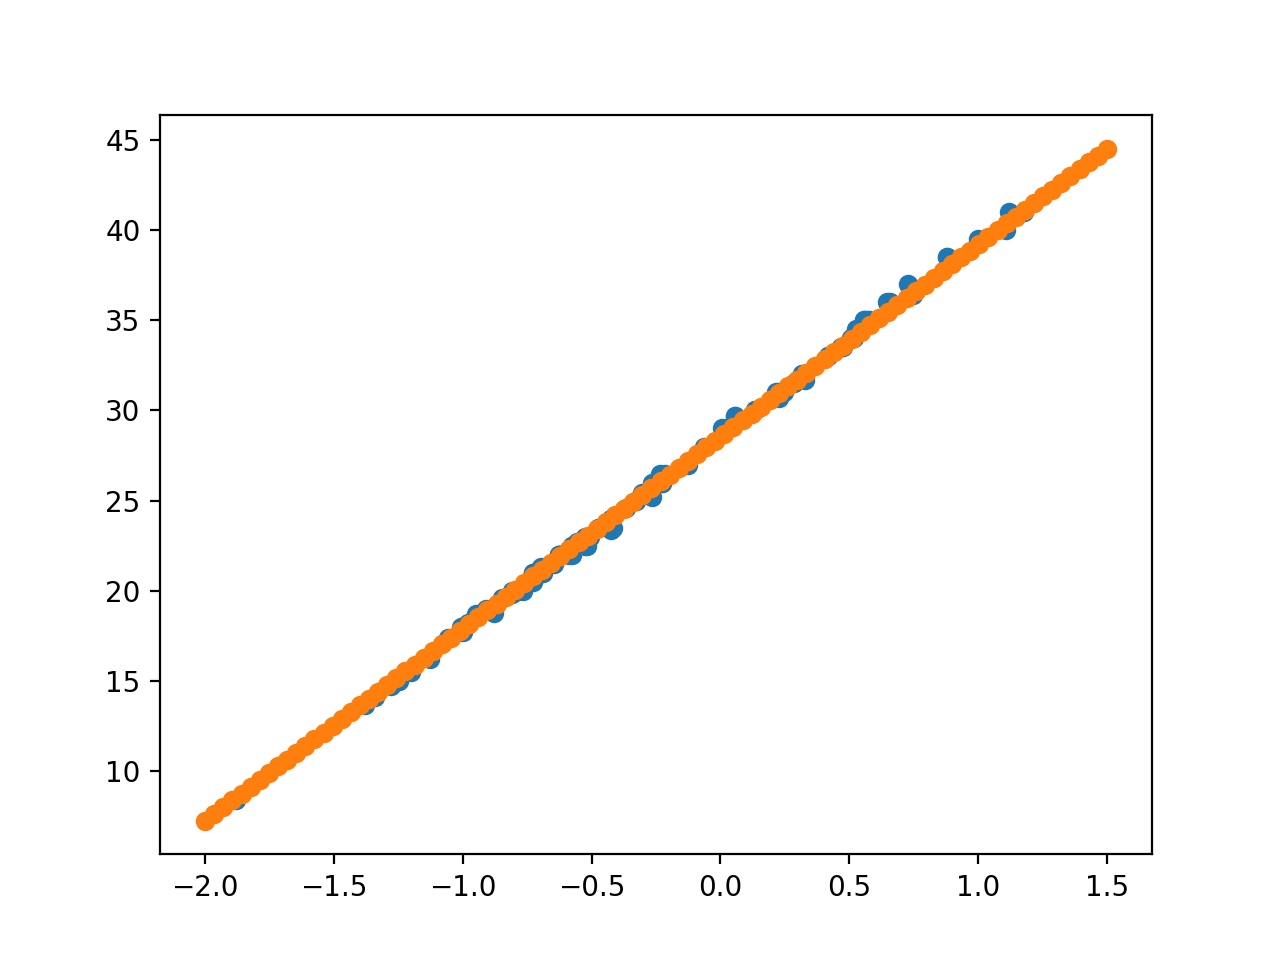

In [7]:
# np.random.seed(1)
xs = np.linspace(-2,1.5,100).reshape(-1,1)
ws = np.random.randn(1,X.shape[1])
b = 0
fig = plt.figure()
ax = fig.subplots()
plt.ion()
plt.title("Linear Regression On Fish Lengths")
plt.xlabel("Length 1")
plt.ylabel("Length 2")
fig.show()
fig.canvas.draw()

for i in range(0,10):
    preds = predict(X,ws,b)
    b, ws = update(b, ws, X, preds, y, learning_rate = 0.005)
    ys = predict(xs,ws,b)
    time.sleep(1)
    ax.clear()
    ax.scatter(X,y.T)
    ax.scatter(xs,ys)
    fig.canvas.draw()

## Experiments

Try fitting the model to all the data - we only used 1 feature of it. How good is the performance. If you like, you can load in your own dataset similar to how we did above and run it on that.

## Gradient Terms

\begin{equation}
\frac{\partial Error}{\partial b} = -2 \sum_{i=1}^N y_i - predictions_i\\
\frac{\partial Error}{\partial w_j} = -2 \sum_{i=1}^N x_{ij}(y_t - predictions_t)
\end{equation}

The sums in both expressions sum over the training examples (samples).

## Summing Up

Well done! You've implemented linear regression using gradient descent completely by hand, and by doing so gained a much deeper insight than a lot of people have into the inner workings of regression. Note that we didn't actually *need* to use gradient descent here - linear regression is so simple that there exists an outright formula to calculate the best weights instantly using the data and the target values. However this is both a blessing and a curse - linear regression is just too simple to work effectively in real world machine learning. We need more powerful algorithms that can't be solved analytically, so your knowledge of gradient descent will prove very useful!

Hope to see you in the next session!

<img src="./eups_logo.svg" alt="EUPS" width="200"/>